# Group Analysis

In [5]:
import pandas as pd
import numpy as np
import os
import pyCompare
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = '/Volumes/schnyer/Megan/Wearables/data/'
results_dir = '/Volumes/schnyer/Megan/Wearables/results/'

In [18]:
cr = pd.read_csv(results_dir + 'cr_cosinor_df.csv').dropna()
npar = pd.read_csv(results_dir + 'cr_nonpar_df.csv').dropna()
cor = pd.read_csv(results_dir + 'ts_correlations.csv')

In [19]:
import re
cr['subject'] = [re.findall("\d+", sub)[0] for sub in cr['Unnamed: 0']]

In [20]:
cor[cor['missing_percent'] > .2]

,subject,missing_percent,r,r_preproc,r_active,r_rest,r_sleep
46,20184,0.339465,0.208992,0.208992,0.426225,-0.017521,0.000969


In [21]:
drop_subs = [10148, 20103, 20184]
cor = cor[~cor['subject'].isin(drop_subs)]
npar = npar[~npar['subject'].isin(drop_subs)]
cr = cr[~cr['subject'].isin(drop_subs)]

In [22]:
cor['group'] = np.where(cor['subject'] < 20000, 'Young Adults', 'Older Adults')
cor.groupby('group').describe().T.reindex(columns=['Young Adults', 'Older Adults']).to_latex(
    '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/ts_cor.tex', index=True, float_format="%.2f")
cor.groupby('group').describe().T.reindex(columns=['Young Adults', 'Older Adults'])

group                  Young Adults  Older Adults
subject         count     22.000000     22.000000
                mean   10081.272727  20143.181818
                std       61.020825     26.734384
                min    10011.000000  20105.000000
                25%    10024.250000  20122.250000
                50%    10051.000000  20136.500000
                75%    10144.750000  20166.750000
                max    10152.000000  20182.000000
missing_percent count     22.000000     22.000000
                mean       0.101252      0.108157
                std        0.025647      0.051514
                min        0.012010      0.017114
                25%        0.092497      0.091405
                50%        0.101655      0.107655
                75%        0.116389      0.145421
                max        0.138699      0.190742
r               count     22.000000     22.000000
                mean       0.307784      0.309476
                std        0.074029      0.064302
                min        0.086543      0.160973
                25%        0.287905      0.272592
                50%        0.308473      0.309331
                75%        0.329317      0.359362
                max        0.465212      0.415589
r_preproc       count     22.000000     22.000000
                mean       0.307784      0.309476
                std        0.074029      0.064302
                min        0.086543      0.160973
                25%        0.287905      0.272592
                50%        0.308473      0.309331
                75%        0.329317      0.359362
                max        0.465212      0.415589
r_active        count     22.000000     22.000000
                mean       0.578569      0.604569
                std        0.139402      0.116110
                min        0.103082      0.321771
                25%        0.543192      0.528064
                50%        0.602689      0.603566
                75%        0.629088      0.703297
                max        0.792242      0.793725
r_rest          count     22.000000     22.000000
                mean      -0.008616     -0.003149
                std        0.012999      0.013605
                min       -0.029809     -0.018452
                25%       -0.017936     -0.011857
                50%       -0.010586     -0.008278
                75%       -0.001376      0.002130
                max        0.020193      0.036726
r_sleep         count     22.000000     22.000000
                mean      -0.029408     -0.016448
                std        0.013151      0.024101
                min       -0.053745     -0.057448
                25%       -0.037446     -0.030002
                50%       -0.030118     -0.017183
                75%       -0.024826      0.002272
                max        0.009371      0.028647

In [43]:
from scipy import stats
stats.f_oneway(cor['r_active'], cor['r_rest'], cor['r_sleep'])

F_onewayResult(statistic=960.06516325844, pvalue=3.4419008293639394e-78)

In [45]:
from scipy import stats
stats.ttest_ind(cor['r_active'][cor['group'] == 'Young Adults'], cor['r_active'][cor['group'] == 'Older Adults'])

Ttest_indResult(statistic=-0.6721890451916258, pvalue=0.5051445847394944)

<AxesSubplot:xlabel='group', ylabel='r_preproc'>

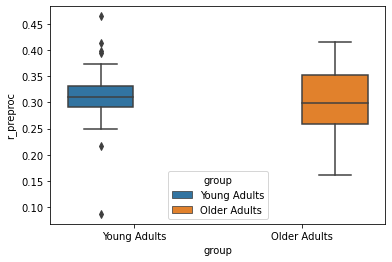

In [7]:
sns.boxplot(x='group', y='r_preproc', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_active'>

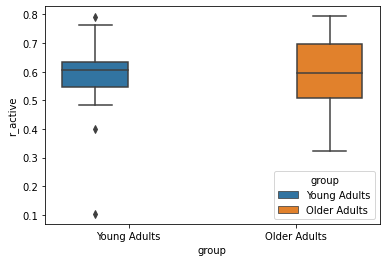

In [8]:
sns.boxplot(x='group', y='r_active', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_rest'>

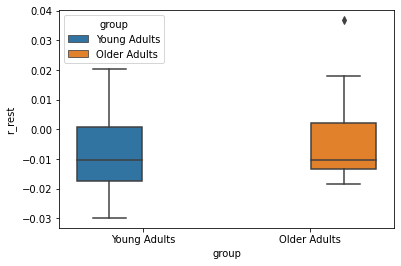

In [9]:
sns.boxplot(x='group', y='r_rest', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_sleep'>

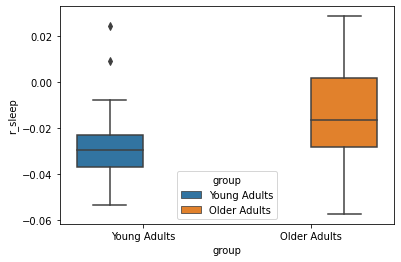

In [10]:
sns.boxplot(x='group', y='r_sleep', hue='group', data=cor) 

In [87]:
npar_act = npar[npar['device'] == 'Actiwatch']
npar_fit = npar[npar['device'] == 'Fitbit']
npar_cor = pd.merge(npar_act, npar_fit, suffixes = ['_act', '_fit'], on='subject')

import pingouin

npar_cors = pd.DataFrame()
npar_cors = npar_cors.append(pingouin.corr(npar_cor['IS_act'], npar_cor['IS_fit'], alternative='two-sided', method='spearman'))
npar_cors = npar_cors.append(pingouin.corr(npar_cor['IV_act'], npar_cor['IV_fit'], alternative='two-sided', method='spearman'))
npar_cors = npar_cors.append(pingouin.corr(npar_cor['RA_act'], npar_cor['RA_fit'], alternative='two-sided', method='spearman'))
npar_cors.to_latex('/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/npar_cor.tex', index=True, float_format="%.2f")
npar_cors

,n,r,CI95%,p-val,power
spearman,47,0.667322,"[0.47, 0.8]",3.010987e-07,0.999699
spearman,47,0.163737,"[-0.13, 0.43]",2.714447e-01,0.197331
spearman,47,0.723057,"[0.55, 0.84]",9.466487e-09,0.999984


/usr/local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Cosinor Measure Bland-Altman Agreement

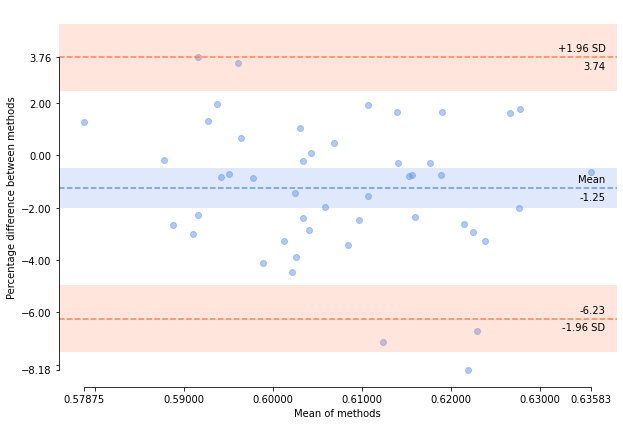

In [23]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['amp'].values, cr[cr['device'] == 'Fitbit']['amp'].values, percentage=True)
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['amp'].values, cr[cr['device'] == 'Fitbit']['amp'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_amplitude.png')

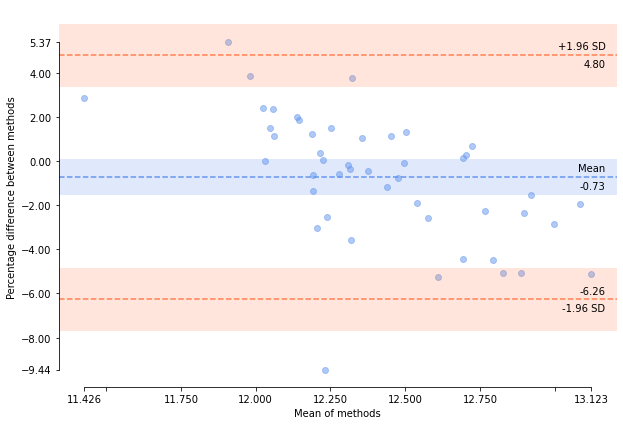

In [24]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['phi'].values, cr[cr['device'] == 'Fitbit']['phi'].values, percentage=True)
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['phi'].values, cr[cr['device'] == 'Fitbit']['phi'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_acrophase.png')

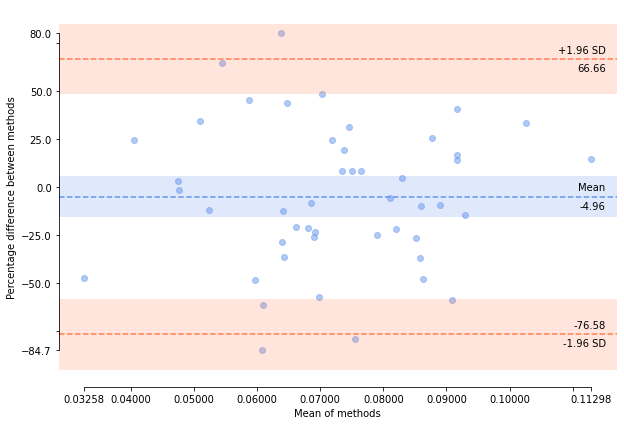

In [25]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['actmin'].values, cr[cr['device'] == 'Fitbit']['actmin'].values, percentage=True)
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['actmin'].values, cr[cr['device'] == 'Fitbit']['actmin'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_minimum.png')

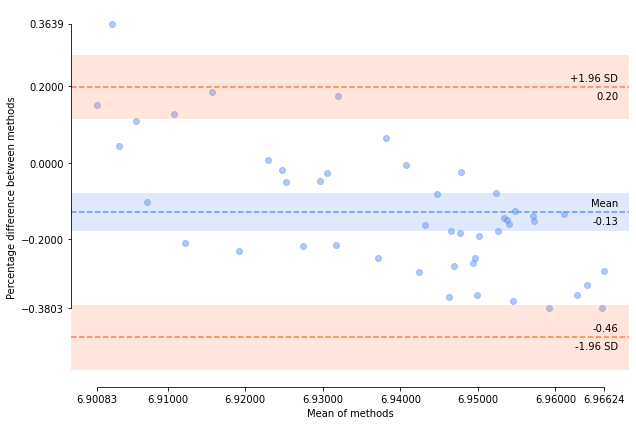

In [26]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['alpha'].values, cr[cr['device'] == 'Fitbit']['alpha'].values, percentage=True)
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['alpha'].values, cr[cr['device'] == 'Fitbit']['alpha'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_width.png')

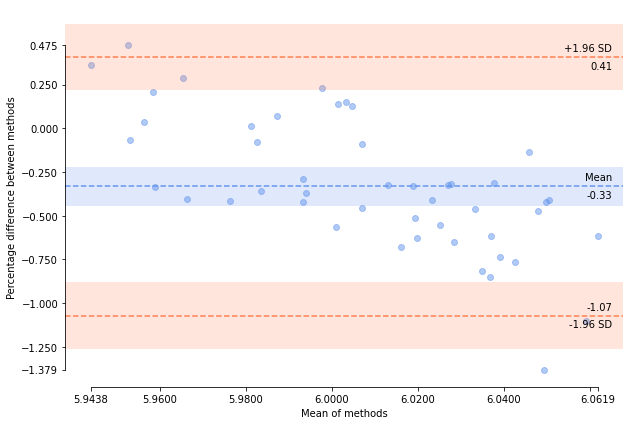

In [27]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['beta'].values, cr[cr['device'] == 'Fitbit']['beta'].values, percentage=True)
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['beta'].values, cr[cr['device'] == 'Fitbit']['beta'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_slope.png')

# Non-parametric Measure Bland-Altman Agreement

In [28]:
from scipy import stats
npar = npar[~npar['subject'].isin([10145])]

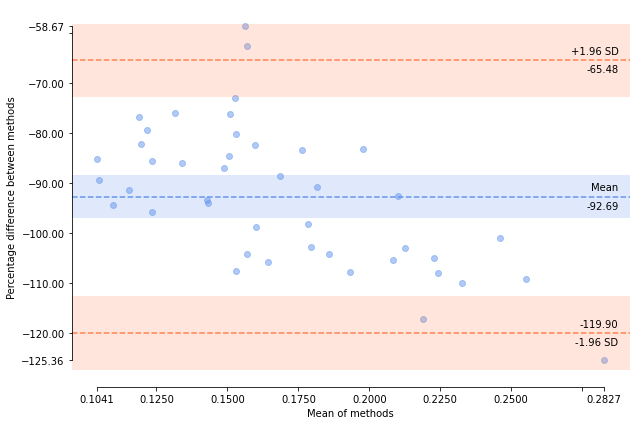

In [29]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IS'].values, npar[npar['device'] == 'Fitbit']['IS'].values, percentage=True)
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IS'].values, npar[npar['device'] == 'Fitbit']['IS'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_IS.png')

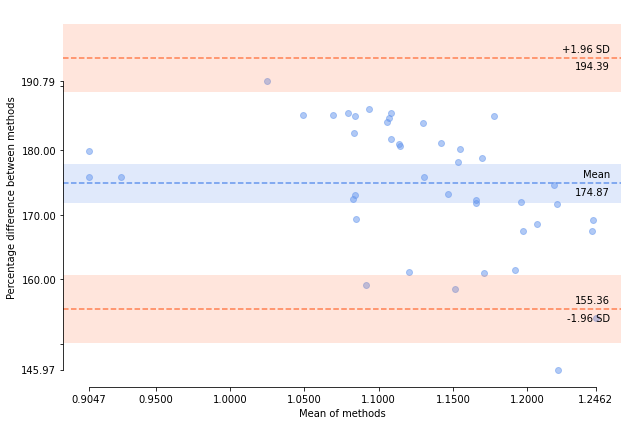

In [30]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IV'].values, npar[npar['device'] == 'Fitbit']['IV'].values, percentage=True)
newplot = pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IV'].values, npar[npar['device'] == 'Fitbit']['IV'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_IV.png')

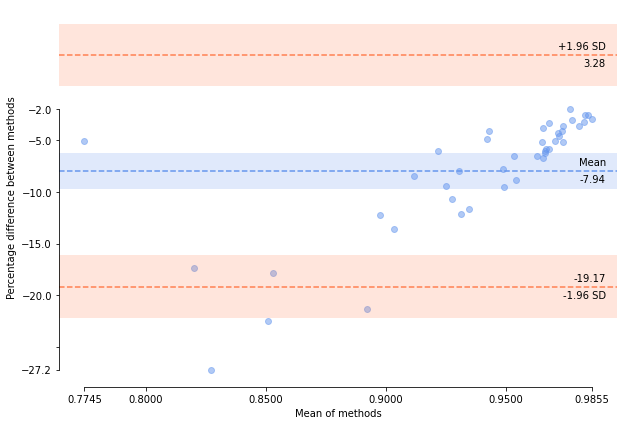

In [31]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['RA'].values, npar[npar['device'] == 'Fitbit']['RA'].values, percentage=True)
newplot = pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['RA'].values, npar[npar['device'] == 'Fitbit']['RA'].values, percentage=True, savePath='/Users/mcmahonmc/Box/CogNeuroLab/Wearables/results/bland_RA.png')